In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import cv2

In [24]:
from glob import glob
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_size = (256, 256,3)
train_path = 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train'
valid_path = 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/val'

In [26]:
# Create an instance of the MobileNet model with the specified input shape
mobilenet = MobileNet(input_shape=image_size, weights='imagenet', include_top=False)

In [27]:
# Freeze the weights of the pre-trained MobileNet model
for layer in mobilenet.layers:
    layer.trainable = False

In [28]:
folders = glob('C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train/*')

In [29]:
folders

['C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Early_blight',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___healthy',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Late_blight',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Target_Spot',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [30]:
len(folders)

6

In [31]:
# Add your own custom layers on top of the pre-trained MobileNet model
x = Flatten()(mobilenet.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

In [32]:
# Create a new model that combines the pre-trained MobileNet model with your custom layers
model = Model(inputs=mobilenet.input, outputs=predictions)

In [33]:
# Compile and train your new model on your dataset
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Print a summary of the model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 16, 16, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 16, 16, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 16, 16, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 16, 16, 512)       262144    
                                                                 
 conv_pw_9

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(256, 256),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 6000 images belonging to 6 classes.


In [39]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='categorical')

Found 600 images belonging to 6 classes.


In [ ]:
history = model.fit(training_set,
          steps_per_epoch=len(training_set),
          epochs=50,
          validation_data=test_set,
          validation_steps=len(test_set))

Epoch 1/50
188/188 [==============================] - 408s 2s/step - loss: 7.0904 - accuracy: 0.7518 - val_loss: 0.7176 - val_accuracy: 0.8067
Epoch 2/50
188/188 [==============================] - 442s 2s/step - loss: 0.3495 - accuracy: 0.8817 - val_loss: 0.5420 - val_accuracy: 0.8400
Epoch 3/50
188/188 [==============================] - 462s 2s/step - loss: 0.3056 - accuracy: 0.8962 - val_loss: 0.2861 - val_accuracy: 0.8950
Epoch 4/50
188/188 [==============================] - 439s 2s/step - loss: 0.2393 - accuracy: 0.9173 - val_loss: 0.4588 - val_accuracy: 0.8667
Epoch 5/50
188/188 [==============================] - 464s 2s/step - loss: 0.2543 - accuracy: 0.9113 - val_loss: 0.2857 - val_accuracy: 0.9050
Epoch 6/50
188/188 [==============================] - 442s 2s/step - loss: 0.2206 - accuracy: 0.9240 - val_loss: 0.3041 - val_accuracy: 0.8983
Epoch 7/50
188/188 [==============================] - 457s 2s/step - loss: 0.1966 - accuracy: 0.9268 - val_loss: 0.3167 - val_accuracy: 0.8933

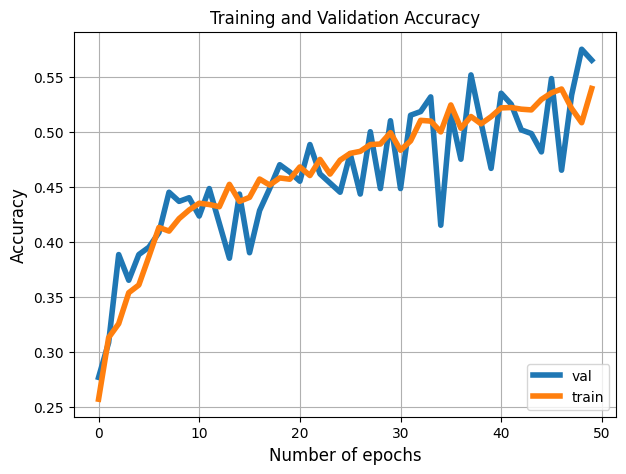

In [17]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

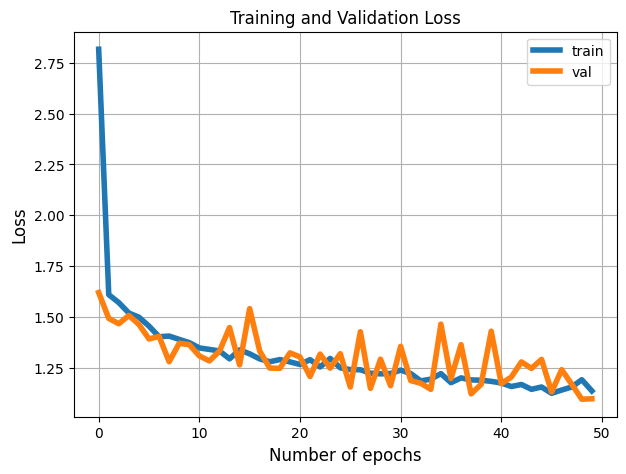

In [18]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()

plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

19/19 [==============================] - 7s 339ms/step - loss: 1.0975 - accuracy: 0.5650
Test accuracy: 0.5649999976158142


In [159]:
model.save('C:/Users/Dell/Desktop/Tomato Leaf disease detection/model_v2.h5')

In [ ]:
with open('model_versions.txt', 'a') as f:
    f.write('model_v2.h5\n')

1/1 [==============================] - 0s 56ms/step
Tomato_Yellow_Leaf_Curl_Virus


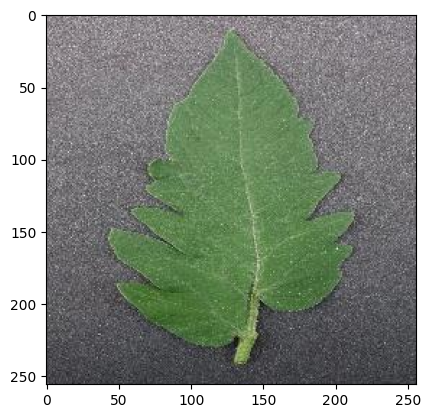

In [22]:
from PIL import Image
import numpy as np

img_path =  "C:/Users/Dell/Desktop/HL Leaf.jpg"
img = Image.open(img_path)
img_resized = img.resize((256, 256))
plt.imshow(img_resized)
img_array = np.array(img_resized) / 255.0
plt.imshow(img_array)
img_reshaped = img_array.reshape((1, 256, 256, 3))
plt.imshow(img_reshaped[0])


input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)

if input_label == 0:
    print("Early_blight")
elif input_label == 1:
    print("Healthy")
elif input_label == 2:
    print("Late_blight")
elif input_label == 3:
    print("Septoria_leaf_spot")
elif input_label == 4:
    print("Target_Spot")
elif input_label == 5:
    print("Tomato_Yellow_Leaf_Curl_Virus")


1/1 [==============================] - 0s 52ms/step
[[6.3228995e-21 1.2479670e-07 2.3862920e-20 1.2438975e-16 6.8984148e-26
  9.9999988e-01]]
5
Tomato_Yellow_Leaf_Curl_Virus


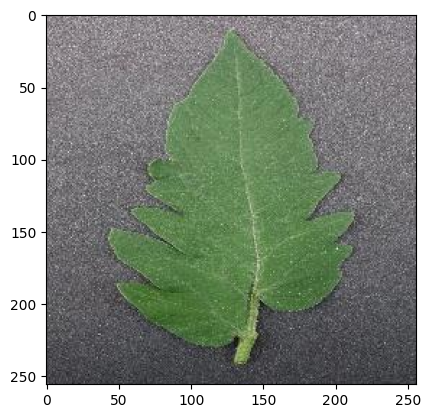

In [158]:
img_test = cv2.imread("C:/Users/Dell/Desktop/HL Leaf.jpg"  )
img_resize = cv2.resize(img_test,(256, 256))
#plt.imshow(mpimg.imread('dataset/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1bef6514-c4be-4417-a390-3c506d4f1404___UF.GRC_YLCV_Lab 02020.JPG'))
img_scaled = img_resize/255

#BGR to RGB
img_rgb = np.flip(img_scaled, axis=-1)

plt.imshow(img_rgb)
img_reshaped = np.reshape(img_rgb,[1,256, 256,3])
#img_array = img_to_array(img_rgb) #It is better to use these two lines instead of img_reshaped = np.reshape(img_rgb,[1,256,256,3]). Both give same result but these do not depend on the scenario.
#img_reshaped = img_array.reshape((1,) + img_array.shape)

input_pred = model.predict(img_reshaped)
print(input_pred)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Early_blight")
elif input_label == 1:
    print("Healthy")
elif input_label == 2:
    print("Late_blight")
elif input_label == 3:
    print("Septoria_leaf_spot")
elif input_label == 4:
    print("Target_Spot")
elif input_label == 5:
    print("Tomato_Yellow_Leaf_Curl_Virus")